In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare
import scipy.stats as stats
import numpy as np

In [ ]:
# Load the data into a pandas DataFrame
data = pd.read_csv("Florida_NonMotorist_Fatal_and_Serious_Injuries_2019_4990189916879522819.csv")

# Display the first few rows
print(data.head())


   FID                         Person Key       Crash Key  FDOT Crash Number  \
0    1  880992810-2019-880992810-88099281  2019-880992810          880992810   
1    2  880995770-2019-880995770-88099577  2019-880995770          880995770   
2    3  880996320-2019-880996320-88099632  2019-880996320          880996320   
3    4  881010510-2019-881010510-88101051  2019-881010510          881010510   
4    5  881022360-2019-881022360-88102236  2019-881022360          881022360   

   FLHSMV Crash Number              Crash Date Crash Time Crash Time Slot  \
0             88099281  04/01/2019 09:35:00 AM    9:35 AM       4: 9A-12P   
1             88099577  04/23/2019 09:52:00 AM    9:52 AM       4: 9A-12P   
2             88099632  04/15/2019 07:23:00 PM    7:23 PM        7: 6P-9P   
3             88101051  03/21/2019 08:57:00 AM    8:57 AM        3: 6A-9A   
4             88102236  03/07/2019 09:03:00 AM    9:03 AM       4: 9A-12P   

  Crash Day  FDOT Managing District  ...  Person Action 

In [ ]:
# Alcohol and drugs analysis

# Calculating proportions of accidents involving substances

# Define a new column to categorize accidents based on substance involvement
def categorize_substance_use(row):
    if row['Suspected Alcohol Use'] == 'Yes' and row['Suspected Drug Use'] == 'Yes':
        return 'Both'
    elif row['Suspected Alcohol Use'] == 'Yes':
        return 'Alcohol Only'
    elif row['Suspected Drug Use'] == 'Yes':
        return 'Drugs Only'
    else:
        return 'Neither'

data['Substance_Involvement'] = data.apply(categorize_substance_use, axis=1)

# Calculate the frequency of each category
substance_involvement_counts = data['Substance_Involvement'].value_counts()

# Calculate the total number of accidents
total_accidents = data.shape[0]

# Calculate percentages
substance_involvement_percentages = (substance_involvement_counts / total_accidents) * 100

print(substance_involvement_percentages)


Substance_Involvement
Neither         82.068207
Alcohol Only    14.521452
Both             2.860286
Drugs Only       0.550055
Name: count, dtype: float64


<ipython-input-5-3ce1093c610b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Substance Involvement', data=substance_df, palette='coolwarm')


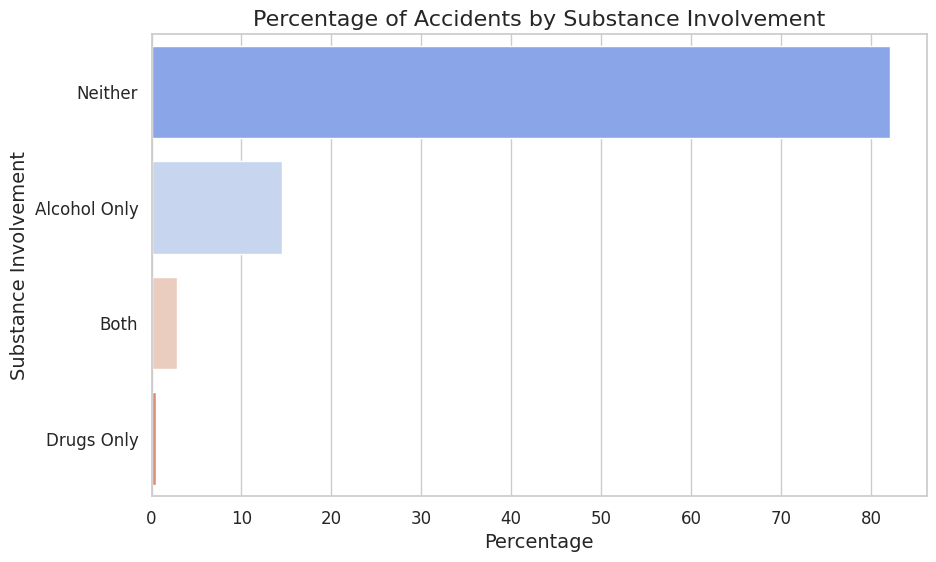

In [ ]:
# Alcohol and drugs analysis


# Plotting the proportions

# Convert series to DataFrame
substance_df = substance_involvement_percentages.reset_index()
substance_df.columns = ['Substance Involvement', 'Percentage']

# Set the seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Substance Involvement', data=substance_df, palette='coolwarm')

# Adding titles and labels for clarity
plt.title('Percentage of Accidents by Substance Involvement', fontsize=16)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Substance Involvement', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


In [ ]:
# Alcohol and drugs analysis


# Evaluate whether the involvement of substances significantly affects the likelihood of fatalities

# Creating a column to indicate fatalities
data['Fatal'] = data['Person Injury'].apply(lambda x: 1 if 'Fatal' in x else 0)

# Creating a column to indicate involvement of alcohol or drugs
data['Alcohol_Drug_Involved'] = data.apply(lambda x: 'Yes' if x['Suspected Alcohol Use'] == 'Yes' or x['Suspected Drug Use'] == 'Yes' else 'No', axis=1)

# Summing up fatalities for each group
fatal_counts = data.groupby('Alcohol_Drug_Involved')['Fatal'].sum()
total_counts = data['Alcohol_Drug_Involved'].value_counts()

# Preparing counts for the z-test
count = np.array([fatal_counts['Yes'], fatal_counts['No']])
nobs = np.array([total_counts['Yes'], total_counts['No']])

# Performing the z-test
z_stat, p_value = proportions_ztest(count, nobs)

print(f'Z-statistic: {z_stat}, p-value: {p_value}')


Z-statistic: 5.382129967917731, p-value: 7.360958427758958e-08


In [ ]:
# Alcohol and drugs analysis


# Calculate fatalities with/without substance involved

data['Substance_Involved'] = data.apply(lambda x: 'Substance Involved' if x['Suspected Alcohol Use'] == 'Yes' or x['Suspected Drug Use'] == 'Yes' else 'No Substance Involved', axis=1)
data['Fatal'] = data['Person Injury'].apply(lambda x: 'Fatal' if 'Fatal' in x else 'Non-Fatal')
fatalities_by_substance = data.groupby(['Substance_Involved', 'Fatal']).size().unstack(fill_value=0)
# Calculate the total number of accidents in each category
totals = fatalities_by_substance.sum(axis=1)

# Calculate the proportion of fatalities in each category
fatalities_proportion = fatalities_by_substance['Fatal'] / totals

print(fatalities_proportion)


Substance_Involved
No Substance Involved    0.191689
Substance Involved       0.386503
dtype: float64


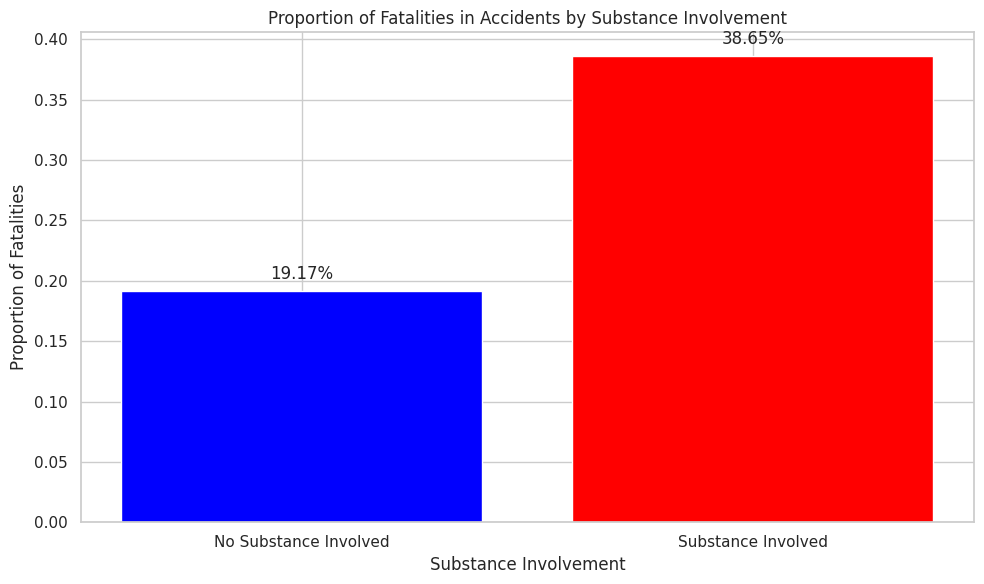

In [ ]:
# Alcohol and drugs analysis

# Graphing propotions

categories = ['No Substance Involved', 'Substance Involved']
proportions = [0.191689, 0.386503]  # Corresponding to the proportions calculated

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, proportions, color=['blue', 'red'])

# Adding title and labels
plt.title('Proportion of Fatalities in Accidents by Substance Involvement')
plt.xlabel('Substance Involvement')
plt.ylabel('Proportion of Fatalities')

# Adding percentage values on top of each bar
for i, proportion in enumerate(proportions):
    plt.text(i, proportion + 0.01, f'{proportion:.2%}', ha = 'center')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Alcohol and drugs analysis


# Calculating the most common person type (pedestrian vs bicyclist) involved in DUI accidents

# Filter data for cases involving substance use
substance_involved_cases = data[(data['Suspected Alcohol Use'] == 'Yes') | (data['Suspected Drug Use'] == 'Yes')]

# Calculate the frequency of each Person Type within substance use cases
person_type_substance_counts = substance_involved_cases['Person Type'].value_counts()

# Display the most common Person Type within substance use cases and its count
most_common_type_substance = person_type_substance_counts.idxmax()
most_common_count_substance = person_type_substance_counts.max()

print(f'Most Common Person Type (Substance Use): {most_common_type_substance}, Count: {most_common_count_substance}')


Most Common Person Type (Substance Use): Pedestrian, Count: 139


In [ ]:
# Alcohol and drugs analysis


# Analyzing significance

# Assuming an equal expected distribution between Pedestrian and Bicyclist for simplicity
expected_each_type = substance_involved_cases.shape[0] / len(person_type_substance_counts)  # Total cases divided by number of categories
expected_counts_substance = [expected_each_type for _ in range(len(person_type_substance_counts))]

# Conduct Chi-square goodness of fit test
chi_stat_substance, p_value_substance = chisquare(person_type_substance_counts, f_exp=expected_counts_substance)

print(f'Chi-square Statistic (Substance Use Cases): {chi_stat_substance}, p-value: {p_value_substance}')


Chi-square Statistic (Substance Use Cases): 81.13496932515338, p-value: 2.1081633014479892e-19


In [ ]:
# Alcohol and drugs analysis


# Calculating the proportions of pedestrians and bicyclists involved in DUI accidents


substance_involved_cases = data[(data['Suspected Alcohol Use'] == 'Yes') | (data['Suspected Drug Use'] == 'Yes')]
# Count the number of pedestrians and bicyclists in substance-involved cases
person_type_counts = substance_involved_cases['Person Type'].value_counts()

# Calculate the total number of substance-involved cases
total_substance_cases = substance_involved_cases.shape[0]

# Calculate proportions
proportion_pedestrians = (person_type_counts.get('Pedestrian', 0) / total_substance_cases) * 100
proportion_bicyclists = (person_type_counts.get('Bicyclist', 0) / total_substance_cases) * 100

print(f"Proportion of Pedestrians: {proportion_pedestrians:.2f}%")
print(f"Proportion of Bicyclists: {proportion_bicyclists:.2f}%")


Proportion of Pedestrians: 85.28%
Proportion of Bicyclists: 14.72%


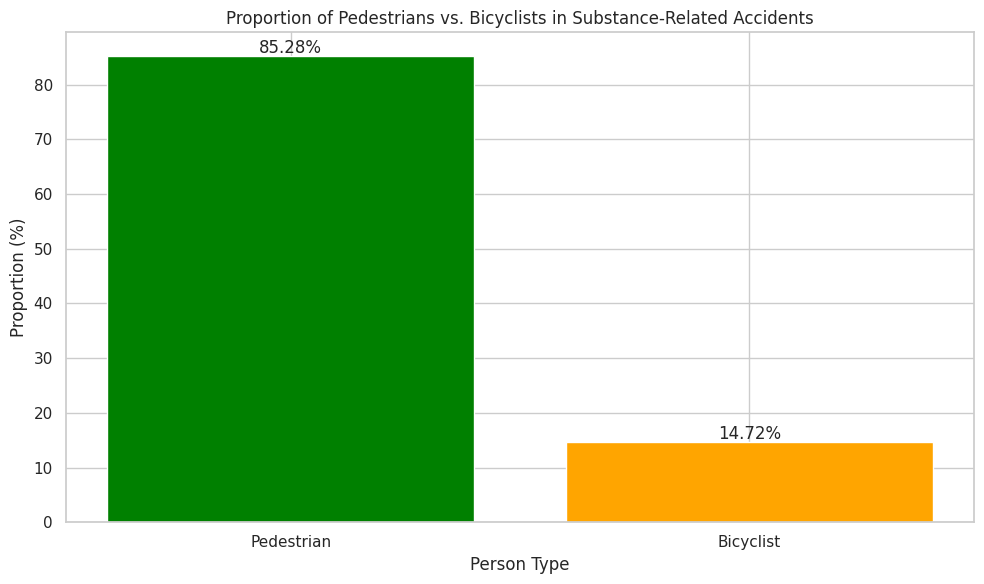

In [ ]:
# Alcohol and drugs analysis

# Graphing proportions

categories_person_type = ['Pedestrian', 'Bicyclist']
proportions_person_type = [85.28, 14.72]  # Update these values with your actual calculated proportions

# Create bar chart for Person Type Proportions in Substance-Involved Cases
plt.figure(figsize=(10, 6))
plt.bar(categories_person_type, proportions_person_type, color=['green', 'orange'])

# Adding title and labels
plt.title('Proportion of Pedestrians vs. Bicyclists in Substance-Related Accidents')
plt.xlabel('Person Type')
plt.ylabel('Proportion (%)')

# Adding percentage values on top of each bar
for i, proportion in enumerate(proportions_person_type):
    plt.text(i, proportion + 0.5, f'{proportion:.2f}%', ha = 'center')

# Show the plot
plt.tight_layout()
plt.show()

Chi-Square Test Results:
Chi-Square Statistic: 10.080825144536993
P-value: 0.7562506647401244
Degrees of Freedom: 14


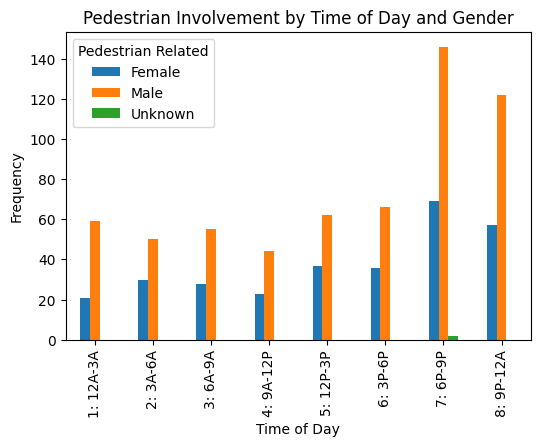

In [ ]:
#Marina
#Chi-Square test for independence
contingency_table = pd.crosstab(data['Crash Time Slot'], data['Person Gender'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
contingency_table = pd.crosstab(data['Crash Time Slot'], data['Person Gender'])

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

#Calculate expected frequencies
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

#Bar chart visualizing observed frequencies of genders throughout different time slots
contingency_table.plot(kind='bar', figsize=(6, 4))
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.title('Pedestrian Involvement by Time of Day and Gender')
plt.legend(title='Pedestrian Related')
plt.show()

In [ ]:
#Marina
# Transform data into count instead of keys
crash_count = data.groupby('Person Gender')['Crash Key'].count()

# Calculating the mean number of crashes
total_crashes = data['Crash Key'].count()
mean_crashes = crash_count/total_crashes

# Calculating the standard deviation and error for the mean crashes of each group
standard_dev = np.sqrt(mean_crashes * (1 - mean_crashes)/total_crashes)
standard_error = standard_dev / np.sqrt(crash_count)

# Calculating z-score and lower/higher confidence interval with 95% confidence
z_score = stats.norm.ppf(0.975)
lower_ci = mean_crashes - (z_score*standard_error)
upper_ci = mean_crashes + (z_score*standard_error)

for gender in mean_crashes.index:
    print(f"Gender: {gender}")
    print(f"Mean Number of Crashes: {mean_crashes[gender]:.4f}")
    print(f"95% Confidence Interval: ({lower_ci[gender]:.4f}, {upper_ci[gender]:.4f})\n")

Gender: Female
Mean Number of Crashes: 0.3311
95% Confidence Interval: (0.3294, 0.3329)

Gender: Male
Mean Number of Crashes: 0.6645
95% Confidence Interval: (0.6632, 0.6657)

Gender: Unknown
Mean Number of Crashes: 0.0022
95% Confidence Interval: (0.0000, 0.0044)



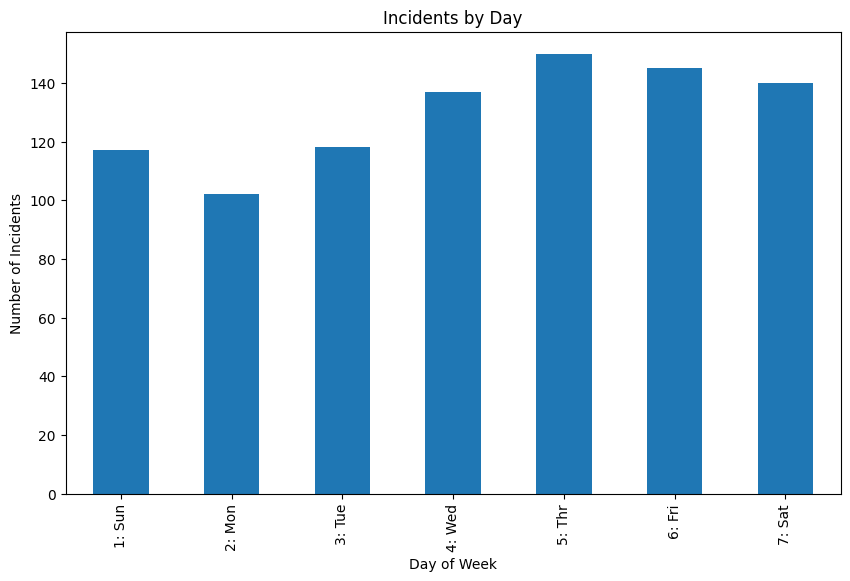

In [ ]:
#Marina
# Order week days
data['Crash Day'] = pd.Categorical(data['Crash Day'], categories=['1: Sun','2: Mon','3: Tue','4: Wed','5: Thr','6: Fri','7: Sat'], ordered=True)

# Plot bar graph including count of incidents by the day of the week
plt.figure(figsize=(10, 6))
data['Crash Day'].value_counts().sort_index().plot(kind='bar')
plt.title('Incidents by Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.show()